In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


from hmm_tutorial.hmm import MarkovModel
from hmm_tutorial.hmm import PoissonHiddenMarkovModel
from hmm_tutorial.hmm import random_transition_matrix

%load_ext autoreload
%autoreload 2

## Markov Chains

This models the probabilities of transitioning between states.

![](assets/markov_chain.png)

$Q = q_1, q_2 ...q_n$ -> a set of $n$ states

$A = a_{11}, a_{12}...a_{nn}$ -> a transition probability matrix 

$\pi = \pi_1, ... \pi_n$ -> an initial probability distribution over states

### Assumptions

> **Markov Assumption**: The probability of being in state $q_i$ only depends on the previous state $q_{i-1}$: $$P(q_i|q_1...q_{i−1}) = P(q_i|q_{i−1})$$


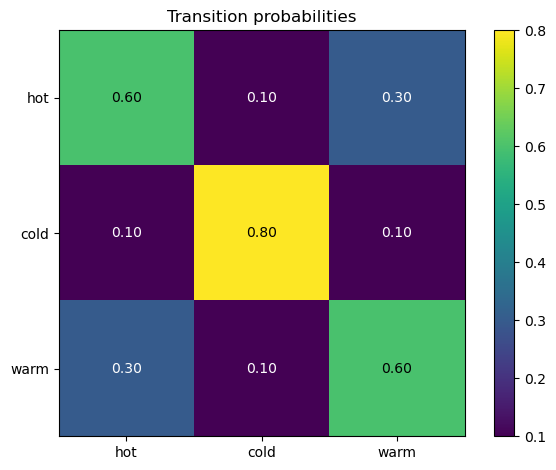

In [2]:
states = ["hot", "cold", "warm"]
hot_cold_tm = np.array([
    [0.6, 0.1, 0.3],
    [0.1, 0.8, 0.1],
    [0.3, 0.1, 0.6],
])
assert (hot_cold_tm.sum(axis=1) == 1).all()

temperature_markov_model = MarkovModel(states, hot_cold_tm)
temperature_markov_model.plot_transition_matrix()

In [3]:
n_steps = 5
temperature_markov_model.trajectory(n_steps)

0->0
0->1
1->1
1->1
1->1


['hot', 'hot', 'cold', 'cold', 'cold', 'cold']

## Hidden Markov Model

In many cases, however, the events we are interested in are hidden: we don’t observe them directly. 

A hidden Markov model (HMM) allows us to talk about _observed_ events and the _hidden_ events which are the causal factors in our probabilistic model.

![](assets/hidden_markov_model_hot_cold.png)

$Q = q_1, q_2 ...q_n$ -> a set of n states

$A = a_{11}, a_{12}...a_{nn}$ -> a transition probability matrix 

$\pi = \pi_1, ... \pi_n$ -> an initial probability distribution over states

$O = o_1, o_2 ...o_T$ -> a sequence of T observations, each one drawn from a vocabulary $V$

$B = b_i(o_t)$ -> emission probabilities expressing the probability of observation $o_t$ being generated from state $q_i$

### Assumptions

> **Markov Assumption**: The probability of being in state $i$ only depends on the previous state $i-1$: $$P(qi|q1...qi−1) = P(qi|qi−1)$$

> **Output Independance**: The observation only depends on the current state (not effected by previous states): $$P(oi|q1 ...qi,...,qT ,o1,...,oi,...,oT ) = P(oi|qi)$$



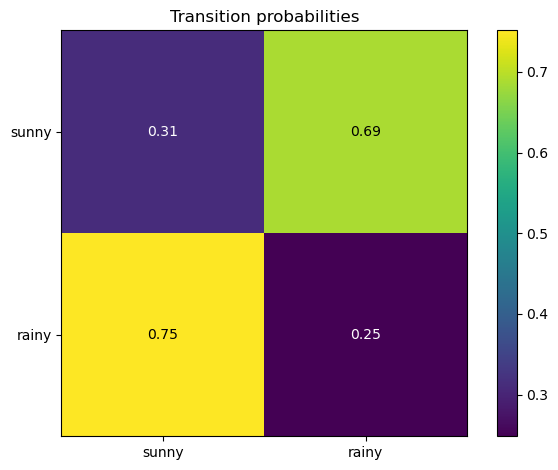

In [4]:
# Example: imagine you are an meteorologist in the future trying to determine whether or not June 2023 was sunny or rainy. All you have is an old smart watch from a runner, called Jesse. 
# All you can see is how many kilometers Jesse ran every day - these are the observations. 
# The weather, the states, are hidden from us.

states = ["sunny", "rainy"]
median_kms = [5, 2]
tm = random_transition_matrix(n_states=len(states))
hmm = PoissonHiddenMarkovModel(
    state_names=states, 
    state_output_dists=median_kms,
    transition_matrix=tm,
)

hmm.plot_transition_matrix()

In [5]:
state_trajectory, observations = hmm.trajectory(30)
print(f"Kilometers run: {observations}")

Kilometers run: [1, 1, 5, 1, 1, 8, 9, 3, 4, 0, 5, 1, 5, 3, 2, 6, 4, 2, 5, 1, 6, 2, 2, 9, 3, 0, 1, 0, 6, 5, 4]


## Types of Questions

Given the framing of a hidden markov model there are 3 fundamental questions that one can answer:

1. **Likelihood**
    - Given: HMM λ = (A, B) and an observation sequence O
    - Determine: likelihood P(O|λ )
2. **Decoding**
    - Given: HMM λ = (A, B) and an observation sequence O
    - Determine: the most likely sequence of hidden states Q
3. **Learning**
    - Given: an observation sequence O and the set of possible states
    - Determine: the HMM parameters A and B (learned model parameters)

## Likelihood

Computing Likelihood: Given an HMM λ = (A, B) and an observation sequence O, determine the likelihood P(O|λ ).

['sunny', 'rainy'] [0.34959611 0.65040389]


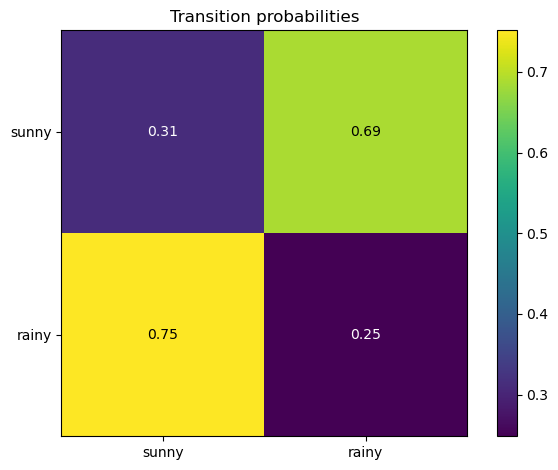

In [6]:
print(hmm.state_names, hmm.init_dist)
hmm.plot_transition_matrix()

In [28]:
observations = [3, 4, 3, 3, 3, 2, 2, 2, 2, 1, 2, 7, 8, 2]
hmm.likelihood(observations, naive=True)

3.1926957490010736e-13

In [29]:
hmm.likelihood(observations)

3.1926957490009903e-13

0.02383988